<a href="https://colab.research.google.com/github/Yerraguntla-Rajesh/Machine-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
#importing dataset
ds=pd.read_csv('/diabetes (1).csv')

In [32]:
#display the first 5 rows in our dataset
ds.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
#check null values are occurred or not
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
#to display information of columns and datatypes fo the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
# summary of the dataset
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
#displaying mean of the columns of dataset
ds.describe().loc['mean']

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Name: mean, dtype: float64

<Axes: >

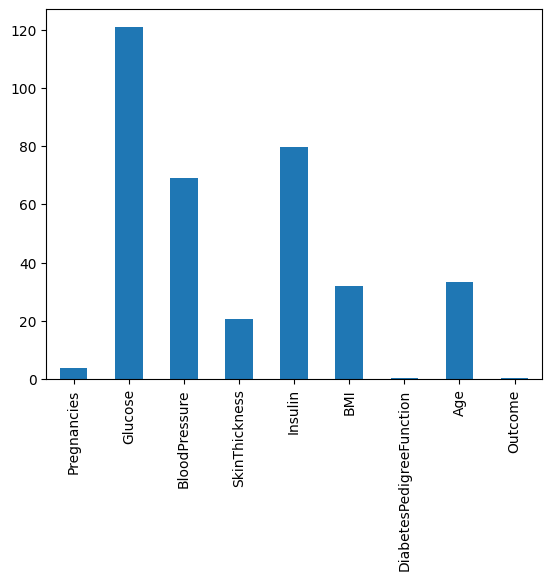

In [37]:
#plotting the bar graph on mean
ds.describe().loc['mean'].plot.bar()


<ipython-input-38-c1b6970f69db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds,bins=25)


<Axes: ylabel='Density'>

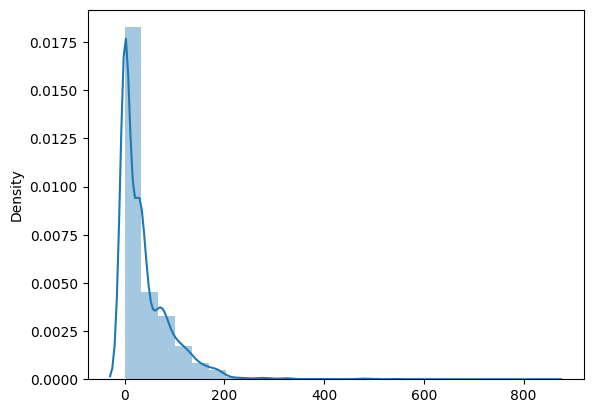

In [38]:
#plotting displot graph of dataset
sns.distplot(ds,bins=25)

In [39]:
#checking missing values
ds.isnull().values.any()

False

In [40]:
#replacing zero values into mean value
zero_not_allowed= ['Glucose', 'BloodPressure','SkinThickness']
for i in zero_not_allowed:
    ds[i] = ds[i].replace(0,np.NaN)
    mean = int(ds[i].mean(skipna = True))
    ds[i] = ds[i].replace(np.NaN, mean)


In [41]:
#Importing  data into "x" and "y" data of  dataset
X = ds.drop('Outcome', axis=1).values
y = ds['Outcome'].values


In [42]:
X.shape,y.shape

((768, 8), (768,))

In [43]:
#Splitting of training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [44]:
#creating and fitting the model
model = svm.SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [45]:
#predict the model when give the test dataset
y_pred = model.predict(x_test)
model.score(x_train,y_train)


0.762214983713355

In [46]:
#display the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [47]:

#display the confusion matrix
confusion_matrix(y_test,y_pred)


array([[98,  9],
       [23, 24]])